<a href="https://colab.research.google.com/github/Lelmats/API-FINAL/blob/main/Practica_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
import keras
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import f1_score, cohen_kappa_score

from keras import layers
from keras import models
from keras.datasets import mnist
from keras.utils import to_categorical

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

In [ ]:
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

In [ ]:
convNN = models.Sequential()

convNN.add(layers.Dense(units     =32,
                        activation  ='relu',
                        input_shape =(28, 28, 1)))

convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))

convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Flatten())
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
convNN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 28, 28, 32)        64        
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dense_1 (Dense)             (None, 14, 14, 64)        2112      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 dense_2 (Dense)             (None, 7, 7, 64)          4160      
                                                                 
 flatten (Flatten)           (None, 3136)              0

In [ ]:
convNN.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
tic = time.time()

convNN.fit(x = train_images,
           y = train_labels,
           epochs    =5,
           batch_size=64,
          verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/5
938/938 - 7s - loss: 0.5059 - accuracy: 0.8355 - 7s/epoch - 8ms/step
Epoch 2/5
938/938 - 4s - loss: 0.2899 - accuracy: 0.9076 - 4s/epoch - 4ms/step
Epoch 3/5
938/938 - 4s - loss: 0.2384 - accuracy: 0.9243 - 4s/epoch - 4ms/step
Epoch 4/5
938/938 - 5s - loss: 0.2159 - accuracy: 0.9313 - 5s/epoch - 5ms/step
Epoch 5/5
938/938 - 4s - loss: 0.1993 - accuracy: 0.9375 - 4s/epoch - 4ms/step
seconds= 24.508321285247803


In [ ]:
test_loss, test_acc = convNN.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 0.1944 - accuracy: 0.9377


In [ ]:
test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

313/313 [==============================] - 1s 3ms/step


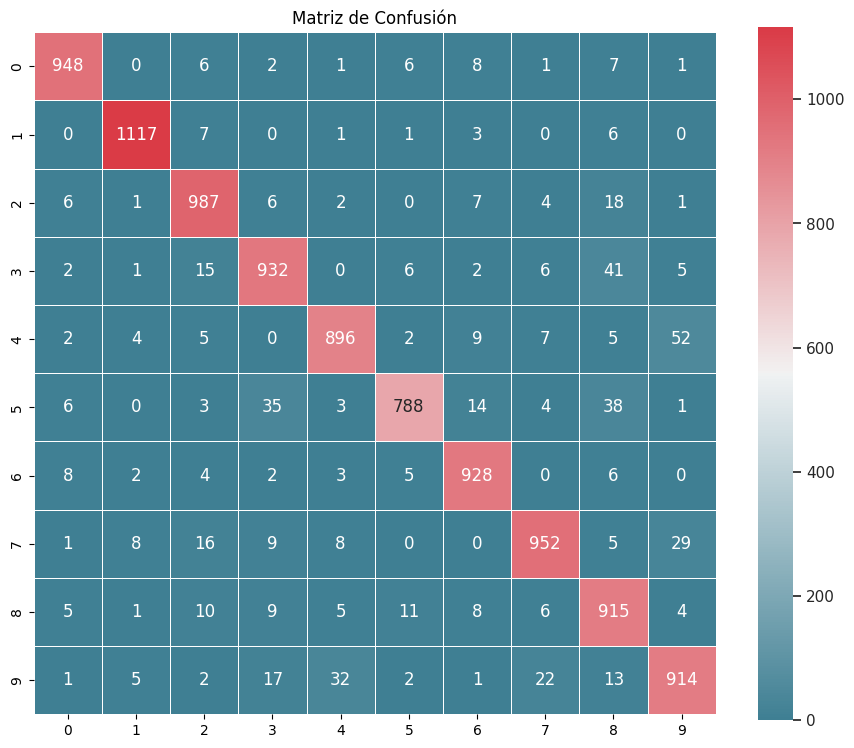

In [ ]:
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()

In [ ]:
convNN = models.Sequential()

convNN.add(layers.Conv2D(filters     =32,
                         kernel_size =(3, 3),
                         activation  ='relu',
                         input_shape =(28, 28, 1)))

convNN.add(layers.MaxPooling2D(pool_size=(2, 2)))
convNN.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
convNN.add(layers.Flatten())
convNN.add(layers.Dense(units=64, activation='relu'))
convNN.add(layers.Dense(units=10, activation='softmax'))

In [ ]:
convNN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 flatten_2 (Flatten)         (None, 7744)              0         
                                                                 
 dense_7 (Dense)             (None, 64)                495680    
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                      

In [ ]:
convNN.compile(optimizer='rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

In [ ]:
tic = time.time()

convNN.fit(x = train_images,
           y = train_labels,
           epochs    =5,
           batch_size=64,
          verbose=2)

print('seconds=', time.time()-tic)

Epoch 1/5
938/938 - 5s - loss: 0.1517 - accuracy: 0.9545 - 5s/epoch - 5ms/step
Epoch 2/5
938/938 - 3s - loss: 0.0444 - accuracy: 0.9863 - 3s/epoch - 3ms/step
Epoch 3/5
938/938 - 3s - loss: 0.0292 - accuracy: 0.9909 - 3s/epoch - 3ms/step
Epoch 4/5
938/938 - 3s - loss: 0.0207 - accuracy: 0.9938 - 3s/epoch - 3ms/step
Epoch 5/5
938/938 - 4s - loss: 0.0150 - accuracy: 0.9953 - 4s/epoch - 4ms/step
seconds= 17.583996534347534


In [ ]:
test_loss, test_acc = convNN.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0350 - accuracy: 0.9904


In [ ]:
test_predicted_labels = convNN.predict(test_images)
test_true_labels      = np.argmax(test_labels,axis=1)
test_predicted_labels = np.argmax(test_predicted_labels,axis=1)

313/313 [==============================] - 1s 3ms/step


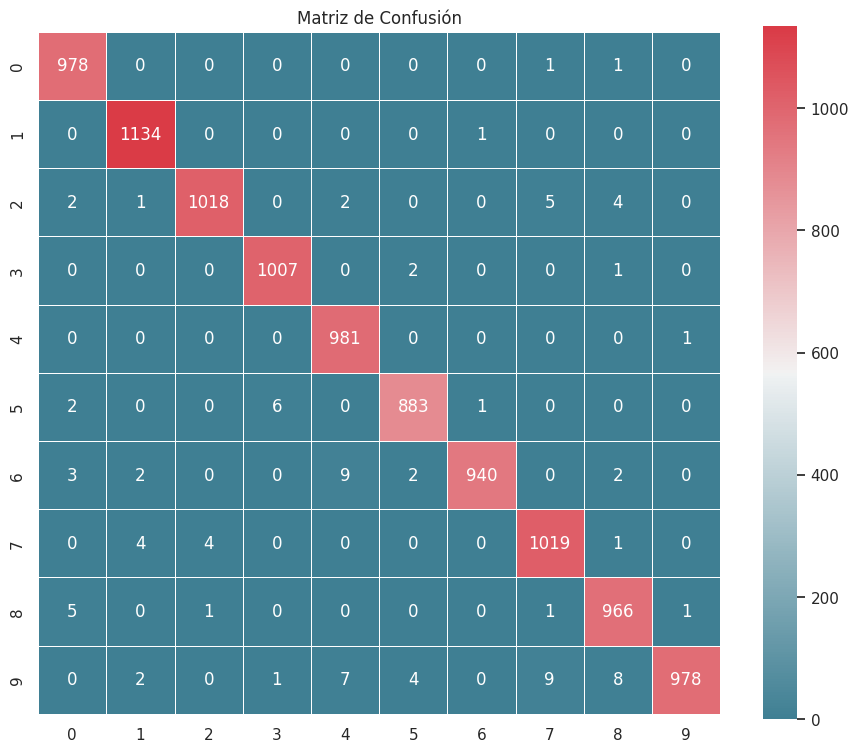

In [ ]:
C = confusion_matrix(test_true_labels, test_predicted_labels)

f, ax = plt.subplots(figsize=(11, 9))
sns.set()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
ax = sns.heatmap(C, cmap=cmap, square=True,
                 annot=True, fmt='d', linewidths=.5)
ax.set_title('Matriz de Confusión')
plt.show()